In [0]:
# !pip install tensorflow==2.0.0-beta1
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten, LSTM
from keras.layers import CuDNNLSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

2.0.0-beta1


Using TensorFlow backend.


In [0]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing the training set
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.2984 - accuracy: 0.9149 - val_loss: 0.1387 - val_accuracy: 0.9592
Epoch 2/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1481 - accuracy: 0.9570 - val_loss: 0.1031 - val_accuracy: 0.9697
Epoch 3/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1095 - accuracy: 0.9667 - val_loss: 0.0945 - val_accuracy: 0.9715
Epoch 4/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0877 - accuracy: 0.9725 - val_loss: 0.0814 - val_accuracy: 0.9757
Epoch 5/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0755 - accuracy: 0.9763 - val_loss: 0.0719 - val_accuracy: 0.9774
Epoch 6/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.0663 - accuracy: 0.9788 - va

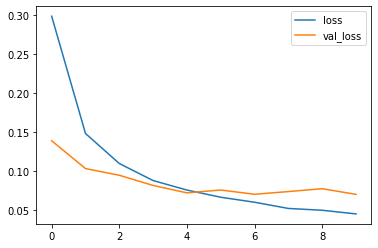

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

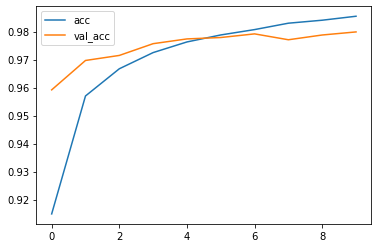

In [0]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
# Evaluate the model (Same as the last epoch during training procedure)
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 0s 37us/sample - loss: 0.0700 - accuracy: 0.9799
[0.07000071281549171, 0.9799]


Confusion matrix, without normalization
[[ 972    0    2    1    0    1    1    2    1    0]
 [   0 1125    3    1    0    0    2    1    3    0]
 [   2    0 1017    1    1    0    0    7    4    0]
 [   0    0    6  984    0    5    0    6    2    7]
 [   1    0    4    0  960    0    3    3    0   11]
 [   2    0    0    5    3  874    2    1    4    1]
 [   6    3    1    1    1    3  941    0    2    0]
 [   2    3   13    2    0    0    0 1003    0    5]
 [   4    1    7    2    3    4    3    5  941    4]
 [   1    5    1    2    8    4    0    6    0  982]]


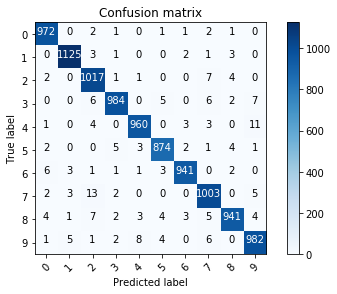

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  Normalization is applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

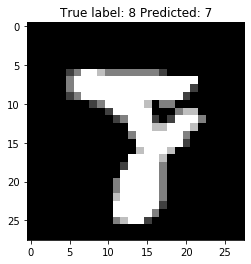

In [0]:
# Show some misclassified examples
  # Pass in FALSE 
misclassified_idx = np.where(p_test != y_test)[0]
  # Randomly choose
i = np.random.choice(misclassified_idx)

plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

### LSTM 

In [0]:
# Build the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [0]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 84s 1ms/sample - loss: 0.3358 - accuracy: 0.8923 - val_loss: 0.1398 - val_accuracy: 0.9548
Epoch 2/10
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.1034 - accuracy: 0.9684 - val_loss: 0.0888 - val_accuracy: 0.9734
Epoch 3/10
60000/60000 [==============================] - 85s 1ms/sample - loss: 0.0713 - accuracy: 0.9785 - val_loss: 0.0575 - val_accuracy: 0.9833
Epoch 4/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.0548 - accuracy: 0.9833 - val_loss: 0.0688 - val_accuracy: 0.9783
Epoch 5/10
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.0448 - accuracy: 0.9862 - val_loss: 0.0536 - val_accuracy: 0.9844
Epoch 6/10
60000/60000 [==============================] - 84s 1ms/sample - loss: 0.0400 - accuracy: 0.9876 - va

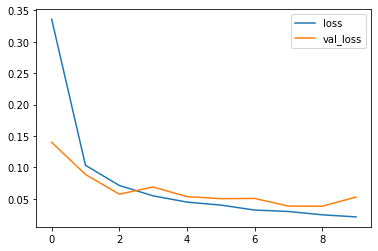

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

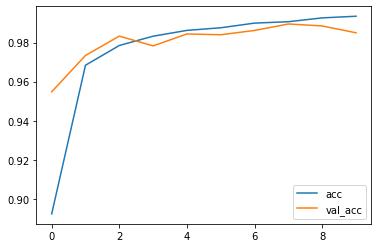

In [0]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 972    0    0    1    0    0    6    1    0    0]
 [   0 1125    5    0    0    0    5    0    0    0]
 [   1    2 1026    0    0    0    3    0    0    0]
 [   0    0    4  998    0    4    0    3    1    0]
 [   1    0    0    0  944    0    8    3    1   25]
 [   0    1    0    6    1  875    5    1    1    2]
 [   0    2    0    0    0    1  955    0    0    0]
 [   0    9   13    0    3    0    0 1000    0    3]
 [   1    0    3    2    0    0    3    3  960    2]
 [   1    1    0    1    1    2    0    5    3  995]]


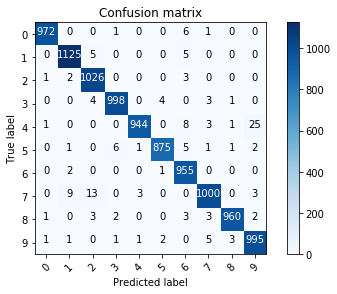

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

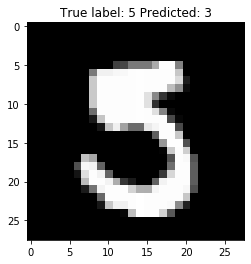

In [0]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));